# Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y,

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a **special case of multiple linear regression.**

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$$
y=\beta_{0}+\beta_{1} x+\beta_{2} x^{2}+\beta_{3} x^{3}+\cdots+\beta_{n} x^{n}+\varepsilon
$$

Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters β0, β1, .... Therefore, for least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating x, x2, ... as being distinct independent variables in a multiple regression mode

# Matrix calculation

The polynomial regression model

$$
y_{i}=\beta_{0}+\beta_{1} x_{i}+\beta_{2} x_{i}^{2}+\cdots+\beta_{m} x_{i}^{m}+\varepsilon_{i}(i=1,2, \ldots, n)
$$

$$
\left[ \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {y_{3}} \\ {\vdots} \\ {y_{n}}\end{array}\right]=\left[ \begin{array}{ccccc}{1} & {x_{1}} & {x_{1}^{2}} & {\ldots} & {x_{1}^{m}} \\ {1} & {x_{2}} & {x_{2}^{2}} & {\ldots} & {x_{2}^{m}} \\ {1} & {x_{3}} & {x_{3}^{2}} & {\ldots} & {x_{3}^{m}} \\ {\vdots} & {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {1} & {x_{n}} & {x_{n}^{2}} & {\ldots} & {x_{n}^{m}}\end{array}\right] \left[ \begin{array}{c}{\beta_{0}} \\ {\beta_{1}} \\ {\beta_{2}} \\ {\vdots} \\ {\beta_{m}}\end{array}\right]+\left[ \begin{array}{c}{\varepsilon_{1}} \\ {\varepsilon_{2}} \\ {\varepsilon_{3}} \\ {\vdots} \\ {\varepsilon_{n}}\end{array}\right]
$$

which when using pure matrix notation is written as

$$
\vec{y}=\mathbf{X} \vec{\beta}+\vec{\varepsilon}
$$

The vector of estimated polynomial regression coefficients (using ordinary least squares estimation) is

$$
\widehat{\vec{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \vec{y}
$$

assuming m < n which is required for the matrix to be invertible; then since {\displaystyle \mathbf {X} } \mathbf {X}  is a Vandermonde matrix, the invertibility condition is guaranteed to hold if all the {\displaystyle x_{i}} x_{i} values are distinct. This is the unique least-squares solution.

# The Bias vs Variance trade-off
**Bias** refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in **under-fitting**.

**Variance** refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in **over-fitting** the data.

<img src="img.png">

# Why polynomial regression ?
To understand the need of polynomial regression let generate some random datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

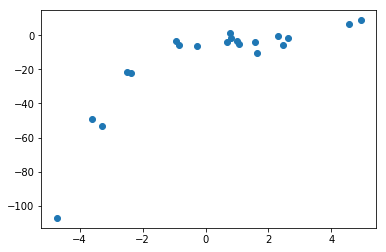

In [2]:
np.random.seed(0)
#x = 2-3*np.random.normal(0,1,20)  # 0 mean 1 standard deviation with 20 values
#y = (x ** 3) + np.random.normal(5, 5, 20) # to create quadratic curve use x^3 function which does not plot a linear line
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y)
plt.show()

In [3]:
# Lets apply linear regression on this data
from sklearn.linear_model import LinearRegression

# 1. Create object of LinearRegression 
# 2. fit the training and testing data
# 3. predict by putting testing data 

In [4]:
x.shape   # (20,)
# transforming the data to include new axis
x = x[:,np.newaxis]  # (20,1)
y = y.reshape(len(y) , 1) # (20,1)

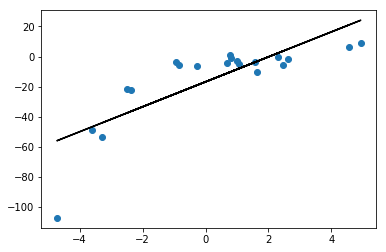

In [5]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,c = 'black')
plt.show()

In [6]:
# Checking the errors
import sklearn.metrics as m

In [7]:
r2 = m.r2_score(y,y_pred)
rmse = m.mean_squared_error(y,y_pred)
print('R square value is :',r2)  # it should be maximum as possible towards 1
print('Root mean square value is :',np.sqrt(rmse))  # it should be minimum as possible towards 0


R square value is : 0.6386750054827146
Root mean square value is : 15.908242501429998


## Now, We can see that the new fitting line is not passing through aleast 70% of data. This is the example of UnderFitting to overcome the underfitting we need to increase the complexity of the model

To generate the high order equation we can add power of the original feature as a new feature

$$
Y=\theta_{0}+\theta_{1} x
$$
can be transformed to 

$$
Y=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}
$$

This is still considered to be linear model as the coefficients associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

R square value is : 0.8537647164420812
Root mean square value is : 10.120437473614711


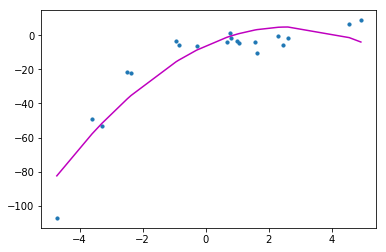

In [38]:
def poly(deg):
    global x,y
    import operator
    import pandas as pd
    from sklearn.preprocessing import PolynomialFeatures

    polynomial_feature = PolynomialFeatures(degree = deg)
    x_poly = polynomial_feature.fit_transform(x)
    #print(x_poly)  # 20,3

    model = LinearRegression()
    model.fit(x_poly , y)
    y_poly_pred = model.predict(x_poly)

    rmse_1 = np.sqrt(m.mean_squared_error(y,y_poly_pred))
    r2_1 = m.r2_score(y,y_poly_pred)
    print('R square value is :',r2_1)  # it should be maximum as possible towards 1
    print('Root mean square value is :',(rmse_1))  # it should be minimum as possible towards 0

    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_, y_poly_pred, color='m')
    plt.show()
    
    
poly(2)

R square value is : 0.9845143345421614
Root mean square value is : 3.293351887947393


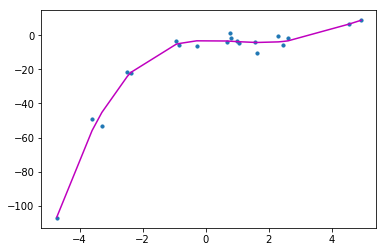

In [39]:
poly(5)
 # best fit

R square value is : 0.9982308265442509
Root mean square value is : 1.1131620902350652


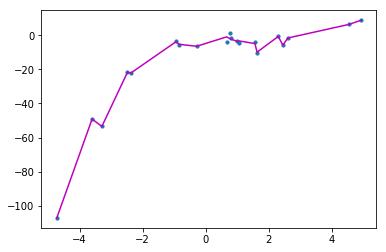

In [42]:
poly(20)

### This model also captures the noise in the data. This is the case of overfitting. Even though it passing throught most of the data. It fails to generalize unseen data. In simple words this curve is only designed for this data. If we change the data it fails to predict